60201359 이주영 8주차 실습

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=sns.load_dataset('iris')
print(df.shape)
df

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
#standard 스케일링
from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(df.drop(['species'],axis=1))
df_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

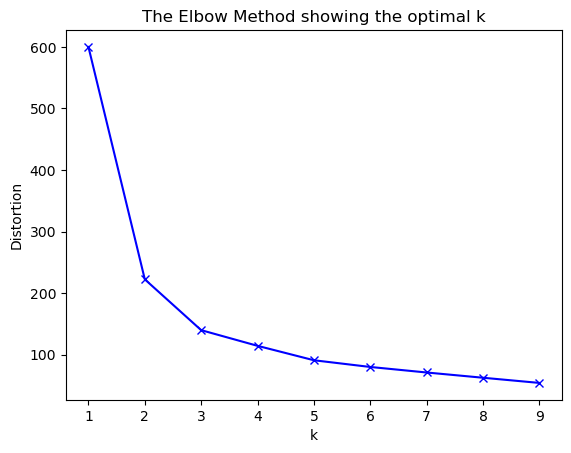

In [9]:
#오차제곱합으로 최적 클러스터 개수 찾기
X = df_scaled

inertia_arr = [] #SSE값을 저장하기 위한 list
K = range(1,10)

for k in K :
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X) #모델적합
    inertia = kmeanModel.inertia_
    inertia_arr.append(inertia)
    
#Plot the elbow
plt.plot(K,inertia_arr, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X) ##클러스터 설정, 3개로 세팅

C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [11]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [12]:
#원데이터에 클러스터링 결과 추가
df['cluster_id'] = kmeans.labels_
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [13]:
#cluster id 오름차순 정렬
df = df.sort_values(by='cluster_id')
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_id
74,6.4,2.9,4.3,1.3,versicolor,0
83,6.0,2.7,5.1,1.6,versicolor,0
82,5.8,2.7,3.9,1.2,versicolor,0
81,5.5,2.4,3.7,1.0,versicolor,0
80,5.5,2.4,3.8,1.1,versicolor,0
...,...,...,...,...,...,...
115,6.4,3.2,5.3,2.3,virginica,2
117,7.7,3.8,6.7,2.2,virginica,2
118,7.7,2.6,6.9,2.3,virginica,2
122,7.7,2.8,6.7,2.0,virginica,2


In [14]:
#차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #차원개수선정 그래프상에 나타내기 위해 2차원
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

print("축소전: ", df_scaled.shape)
print("축소후: ", df_pca.shape)

축소전:  (150, 4)
축소후:  (150, 2)


In [15]:
cols= ["pc1","pc2"]
df_pca = pd.DataFrame(data=df_pca, columns = cols)
df_pca

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [19]:
#종 칼럼과 클러스터번호 칼럼 추가
df_pca["name"] = df.species
df_pca["target"] = df.cluster_id

df_pca

,pc1,pc2,name,target
0,-2.264703,0.480027,setosa,1
1,-2.080961,-0.674134,setosa,1
2,-2.364229,-0.341908,setosa,1
3,-2.299384,-0.597395,setosa,1
4,-2.389842,0.646835,setosa,1
...,...,...,...,...
145,1.870503,0.386966,virginica,2
146,1.564580,-0.896687,virginica,0
147,1.521170,0.269069,virginica,2
148,1.372788,1.011254,virginica,2


# 시각화

Text(0, 0.5, 'pc2')

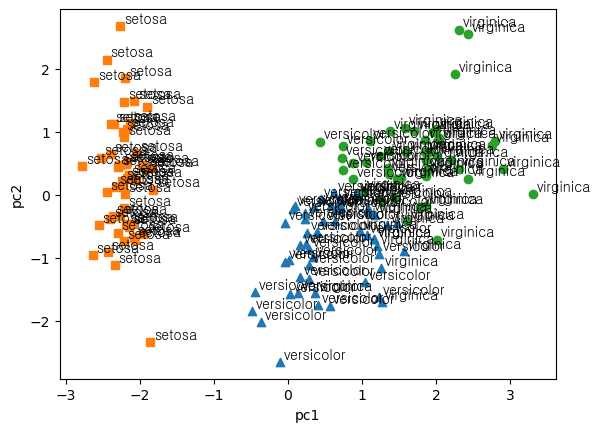

In [20]:
#3 종류의 마커로 그래프 상 좌표표시
markers = ["^", "s", "o"]
for i, marker in enumerate(markers):
    x_val = df_pca[df_pca["target"]==i]["pc1"]
    y_val = df_pca[df_pca["target"]==i]["pc2"]
    plt.scatter(x_val, y_val, marker = marker)
    
#한글폰트 가져오기
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font =font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font)

#종 이름 표시
for i in range(150):
    plt.text(df_pca['pc1'][i]+0.05, df_pca['pc2'][i]+0.05, df_pca['name'][i])

plt.xlabel("pc1")
plt.ylabel("pc2")

In [25]:
#일치하는 개수를 확인
iris_correct=df_pca[df_pca['name']=='setosa']['target'].value_counts()
print("setosa : ", iris_correct)

setosa :  1    50
Name: target, dtype: int64


In [27]:
iris_correct=df_pca[df_pca['name']=='virginica']['target'].value_counts()
print("virginica : ", iris_correct)

virginica :  2    36
0    14
Name: target, dtype: int64


In [28]:
iris_correct=df_pca[df_pca['name']=='versicolor']['target'].value_counts()
print("versicolor : ", iris_correct)

versicolor :  0    39
2    11
Name: target, dtype: int64


* setosa(1)오류 =0개, virginica(2) 오류 =14개 , versicolor(0) 오류= 11개
* 150개 중 25개 오류
* 정확도 약 83.3%